In [131]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




In [132]:
data=pd.read_excel("TowerDefectSD.xlsx")

In [133]:
data.head(10)

,Tower_Id,Voltage_Id,Tower_Type,Tower_Config,Fdn_Type,Wind_Zone,Ckts_on_Tower,Vulnerability,Terrain_Type,sd1,sd2,sd3,sd4,sd5
0,130965,4,QA,VERTICAL,FS,IV,MULTI CIRCUIT,NORMAL,PLAIN,1,0,0,0,0
1,130966,4,DD,VERTICAL,DFR,IV,DOUBLE CIRCUIT,NORMAL,HILLY,2,0,0,0,3
2,130999,4,DA,VERTICAL,WET,IV,DOUBLE CIRCUIT,NORMAL,PLAIN,2,0,0,0,0
3,131031,4,QD,VERTICAL,FS,IV,MULTI CIRCUIT,NORMAL,PLAIN,30,0,0,0,0
4,131032,4,QD,VERTICAL,FS,IV,MULTI CIRCUIT,NORMAL,PLAIN,1,0,0,0,0
5,131047,4,QB,VERTICAL,FS,IV,MULTI CIRCUIT,NORMAL,PLAIN,2,0,0,0,0
6,131049,4,QA,VERTICAL,FS,IV,MULTI CIRCUIT,NORMAL,PLAIN,0,0,0,0,12
7,131050,4,QA,VERTICAL,FS,IV,MULTI CIRCUIT,NORMAL,PLAIN,0,0,12,0,0
8,131064,4,DA,VERTICAL,NaN,IV,DOUBLE CIRCUIT,NORMAL,PLAIN,0,0,0,0,0
9,131083,1,DD,HORIZONTAL,WET,IV,DOUBLE CIRCUIT,NORMAL,PLAIN,0,0,0,0,0


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163880 entries, 0 to 163879
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Tower_Id       163880 non-null  int64 
 1   Voltage_Id     163880 non-null  int64 
 2   Tower_Type     160999 non-null  object
 3   Tower_Config   159762 non-null  object
 4   Fdn_Type       153304 non-null  object
 5   Wind_Zone      162465 non-null  object
 6   Ckts_on_Tower  161983 non-null  object
 7   Vulnerability  163880 non-null  object
 8   Terrain_Type   159650 non-null  object
 9   sd1            163880 non-null  int64 
 10  sd2            163880 non-null  int64 
 11  sd3            163880 non-null  int64 
 12  sd4            163880 non-null  int64 
 13  sd5            163880 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 17.5+ MB


In [135]:
data.describe()

,Tower_Id,Voltage_Id,sd1,sd2,sd3,sd4,sd5
count,163880.000000,163880.000000,163880.000000,163880.000000,163880.000000,163880.000000,163880.000000
mean,338645.817659,3.855321,0.426794,0.009415,0.791475,0.013229,0.675842
std,115013.543844,0.436580,1.326141,0.194137,2.310146,0.226392,2.035451
min,130962.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238484.750000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,351448.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,442345.250000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,532409.000000,4.000000,71.000000,15.000000,76.000000,21.000000,75.000000


In [136]:
col=data.columns

In [137]:
for i in col:
    print(len(data[i].unique()))     #count of unique values in column
    print(data[i].unique())          #list of unique values in a column
    print()

163880
[130965 130966 130999 ... 532392 532407 532409]

4
[4 1 3 2]

169
['QA' 'DD' 'DA' 'QD' 'QB' 'DC' 'DB' 'A' 'QC' 'B' 'C' 'TP' nan ' DD' 'D'
 'SPL C' 'DC+0' 'DA+0' 'DA+3' 'DB+0' 'DD+0' 'DA+6' 'DA+18' 'DB+3' 'DD+6'
 'DC+6' 'DD+18' 'DB+6' 'DC+3' 'DD+9' 'ANCHOR TOWER' 'DCT' 'E' 'DE' 'J'
 'MA' 'MB' 'MD' 'SPL D' 'SPL B' 'SPL A' 'B+0' 'D+3' 'C+0' 'GANTRY' 'D+0'
 'C+3' 'RC' 'D+6' 'B+6' 'A+0' 'C+6' 'D+25' 'DDE+6' 'B+3' 'A+3' 'A+6'
 'C+6(TT)' 'DC+9' 'DD+3' 'DC+03' 'DA+03' 'DD+00' 'DA+00' 'DA+06' 'DC+00'
 'DDE' 'DA+9' 'TPT' 'DA+O' 'QDH' 'QBH+10.5' 'DB+9' 'DB+00' 'DD+09'
 'DC (TAR ROADANP)' 'DDE+0' 'QBH+7.5' 'QDH+16.5' 'DC+0             ( T.P)'
 'DD+0    (RC 1.5) (DE)' 'QDH+7.5' 'DD +0' 'CTP' 'DD+000' 'DB+03' 'DB+06'
 'D+18' 'QDH+0' 'ANCHOR+9' 'SPL' 'DB+0               (RAISE CHIM' 'DB + 0'
 'DB + 9 (+1.5 M RC)' 'S' 'R' 'P' 'Q' 'DD + 0' 'DD+25' 'DC + 0' 'T' 'M'
 'DD + 9' 'CR' 'N+0' 'M+0' 'L+0' 'L+3' 'N+6' 'M+6' 'L+6' 'N+3' 'L' 'N'
 'D+15' 'XX' 'YY' 'XX+3' 'ZZ' 'YY+0' 'DR' 'M+3' 'B+9' 'DD+15' 

In [138]:
# Count of missing values per column
print(data.isnull().sum())

Tower_Id             0
Voltage_Id           0
Tower_Type        2881
Tower_Config      4118
Fdn_Type         10576
Wind_Zone         1415
Ckts_on_Tower     1897
Vulnerability        0
Terrain_Type      4230
sd1                  0
sd2                  0
sd3                  0
sd4                  0
sd5                  0
dtype: int64


In [139]:
# Percentage of missing values per column
print(data.isnull().mean() * 100)

Tower_Id         0.000000
Voltage_Id       0.000000
Tower_Type       1.757994
Tower_Config     2.512814
Fdn_Type         6.453503
Wind_Zone        0.863437
Ckts_on_Tower    1.157554
Vulnerability    0.000000
Terrain_Type     2.581157
sd1              0.000000
sd2              0.000000
sd3              0.000000
sd4              0.000000
sd5              0.000000
dtype: float64


In [140]:
#filling none values in categorical columns (only categorical columns contain none values in this dataset)

for i in col:
    data[i].fillna(data[i].mode().iloc[0], inplace=True)

In [141]:
# Percentage of missing values per column
print(data.isnull().mean() * 100)

Tower_Id         0.0
Voltage_Id       0.0
Tower_Type       0.0
Tower_Config     0.0
Fdn_Type         0.0
Wind_Zone        0.0
Ckts_on_Tower    0.0
Vulnerability    0.0
Terrain_Type     0.0
sd1              0.0
sd2              0.0
sd3              0.0
sd4              0.0
sd5              0.0
dtype: float64


In [142]:
num_zeros_1 = (data[['sd1']] == 0).sum()
print(f"Number of zeros in 'column_name': {num_zeros_1}")
num_zeros_2 = (data[['sd2']] == 0).sum()
print(f"Number of zeros in 'column_name': {num_zeros_2}")
num_zeros_3 = (data[['sd3']] == 0).sum()
print(f"Number of zeros in 'column_name': {num_zeros_3}")
num_zeros_4= (data[['sd4']] == 0).sum()
print(f"Number of zeros in 'column_name': {num_zeros_4}")
num_zeros_5= (data[['sd5']] == 0).sum()
print(f"Number of zeros in 'column_name': {num_zeros_5}")

Number of zeros in 'column_name': sd1    135022
dtype: int64
Number of zeros in 'column_name': sd2    163273
dtype: int64
Number of zeros in 'column_name': sd3    125509
dtype: int64
Number of zeros in 'column_name': sd4    162917
dtype: int64
Number of zeros in 'column_name': sd5    127395
dtype: int64


In [143]:
roman_to_int = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6, 'VII': 7, 'VIII': 8, 'IX': 9, 'X': 10}
data['Wind_Zone'] = data['Wind_Zone'].map(roman_to_int)

In [144]:
#if any defects, converting value to 1
data[['sd1', 'sd2','sd3','sd4','sd5']] = data[['sd1', 'sd2','sd3','sd4','sd5']].applymap(lambda x: 1 if x > 0 else x)

In [145]:
data.drop('Tower_Id',axis=1,inplace=True)

In [146]:
#converting categorical labels into numerical format
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
scaler= MinMaxScaler()
for i in col[1:9]:
    data[i] = label_encoder.fit_transform(data[i])

for i in col[1:14]:
     # Reshape to ensure it's a 2D array with a single feature (column)
    scaled_values = scaler.fit_transform(data[i].values.reshape(-1, 1))
    # Assign back to DataFrame
    data[i] = scaled_values

In [147]:
data.head()


,Voltage_Id,Tower_Type,Tower_Config,Fdn_Type,Wind_Zone,Ckts_on_Tower,Vulnerability,Terrain_Type,sd1,sd2,sd3,sd4,sd5
0,1.0,0.742515,1.0,0.253886,0.5,0.5,0.5,0.875,1.0,0.0,0.0,0.0,0.0
1,1.0,0.425150,1.0,0.119171,0.5,0.0,0.5,0.250,1.0,0.0,0.0,0.0,1.0
2,1.0,0.203593,1.0,0.865285,0.5,0.0,0.5,0.875,1.0,0.0,0.0,0.0,0.0
3,1.0,0.772455,1.0,0.253886,0.5,0.5,0.5,0.875,1.0,0.0,0.0,0.0,0.0
4,1.0,0.772455,1.0,0.253886,0.5,0.5,0.5,0.875,1.0,0.0,0.0,0.0,0.0


In [148]:
target=data[['sd5']]
y=target.to_numpy()

In [149]:
y.shape

(163880, 1)

In [150]:
data.drop('sd5',axis=1,inplace=True)

In [151]:
data.shape


(163880, 12)

In [152]:
# Extract values as a NumPy array
data_array = data.values

n_features = 1

# Reshape the array (assuming [samples, timesteps] shape)
data_reshaped = data_array.reshape((data_array.shape[0], data_array.shape[1], n_features))

In [153]:
data_reshaped.shape

(163880, 12, 1)

# Building LSTM Model

In [154]:
X_train, X_test, y_train, y_test = train_test_split(data_reshaped, y, test_size=0.2, random_state=42)

In [155]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(data_reshaped.shape[1],data_reshaped.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1)
])
model.compile(optimizer='Adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.summary()



C:\Users\91959\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 12, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 12, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,929 (503.63 KB)

 Trainable params: 128,929 (503.63 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
1639/1639 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - loss: 0.1594 - val_loss: 0.1527
Epoch 2/100
1639/1639 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - loss: 0.1511 - val_loss: 0.1525
Epoch 3/100
1639/1639 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 0.1508 - val_loss: 0.1523
Epoch 4/100
1639/1639 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - loss: 0.1523 - val_loss: 0.1522
Epoch 5/100
1639/1639 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - loss: 0.1514 - val_loss: 0.1520
Epoch 6/100
1639/1639 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - loss: 0.1497 - val_loss: 0.1521
Epoch 7/100
1639/1639 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - loss: 0.1517 - val_loss: 0.1518
Epoch 8/100
1639/1639 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - loss: 0.1499 - val_loss: 0.1528
Epoch 9/100
1639/1639 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - loss: 0.1501 - val_loss: 0.1511
Epoch 10/100
1639/1639 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - loss: 0.1499 - val_loss: 0.1504
Epoch 11/100
1639/1639 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - loss: 0.1487 - val_loss: 0.15

In [157]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

1025/1025 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1438
Test Loss: 0.14551395177841187


In [158]:
predictions = model.predict(X_test)

1025/1025 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


In [159]:
y_test_inverse = scaler.inverse_transform(y_test)
predictions_inverse = scaler.inverse_transform(predictions)

In [160]:
predictions.shape

(32776, 1)

In [161]:
y_test.shape


(32776, 1)

In [162]:
y_pred_class = (predictions_inverse > 0.5).astype(int)

In [163]:
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
r2 = r2_score(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.28746054110848995
R-squared: 0.16344752075837743


In [164]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



accuracy = accuracy_score(y_test_inverse, y_pred_class)
precision = precision_score(y_test_inverse, y_pred_class)
recall = recall_score(y_test_inverse, y_pred_class)
f1 = f1_score(y_test_inverse, y_pred_class)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7937210153771052
Precision: 0.5782331027142097
Recall: 0.29568648795754526
F1 Score: 0.3912847753668858


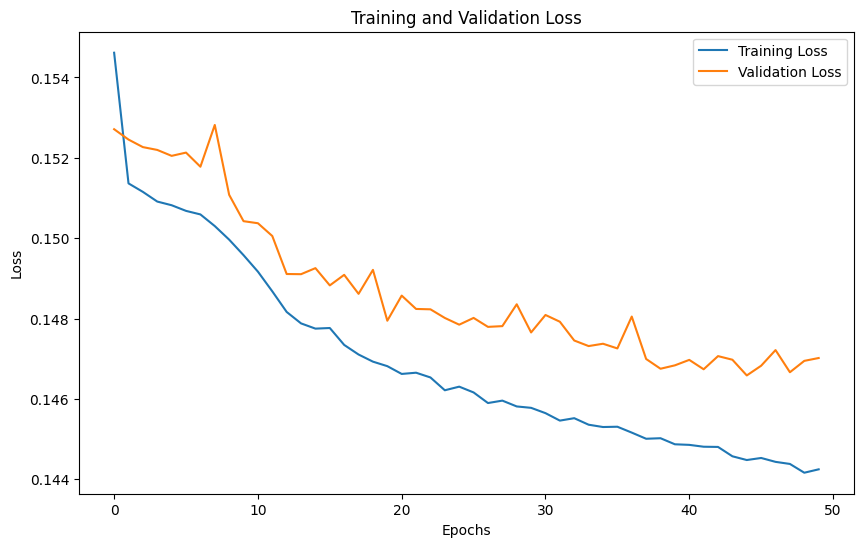

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [166]:
plt.close('all')

Text(0, 0.5, 'Value')

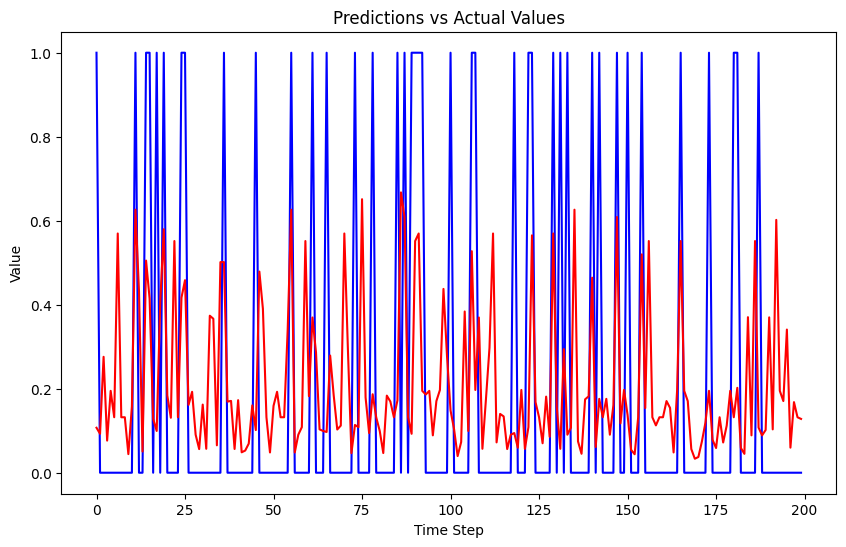

In [167]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse[200:400], color='blue')
plt.plot(predictions_inverse[200:400], color='red')
plt.title('Predictions vs Actual Values')
plt.xlabel('Time Step')
plt.ylabel('Value')